In [19]:
from Bio import SeqIO
from Bio import Phylo
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sequences = {}
for record in SeqIO.parse("sequences.fasta", "fasta"):
    sequences[record.id] = str(record.seq)
print(len(sequences))

529


In [3]:
subpopulations = {}
df = pd.read_csv("mapping.csv")
for index, row in df.iterrows():
    subpopulations[row["Cultivar ID"]] = row["Subpopulation"]


In [27]:
tree = Phylo.read("tree.nwk", "newick")

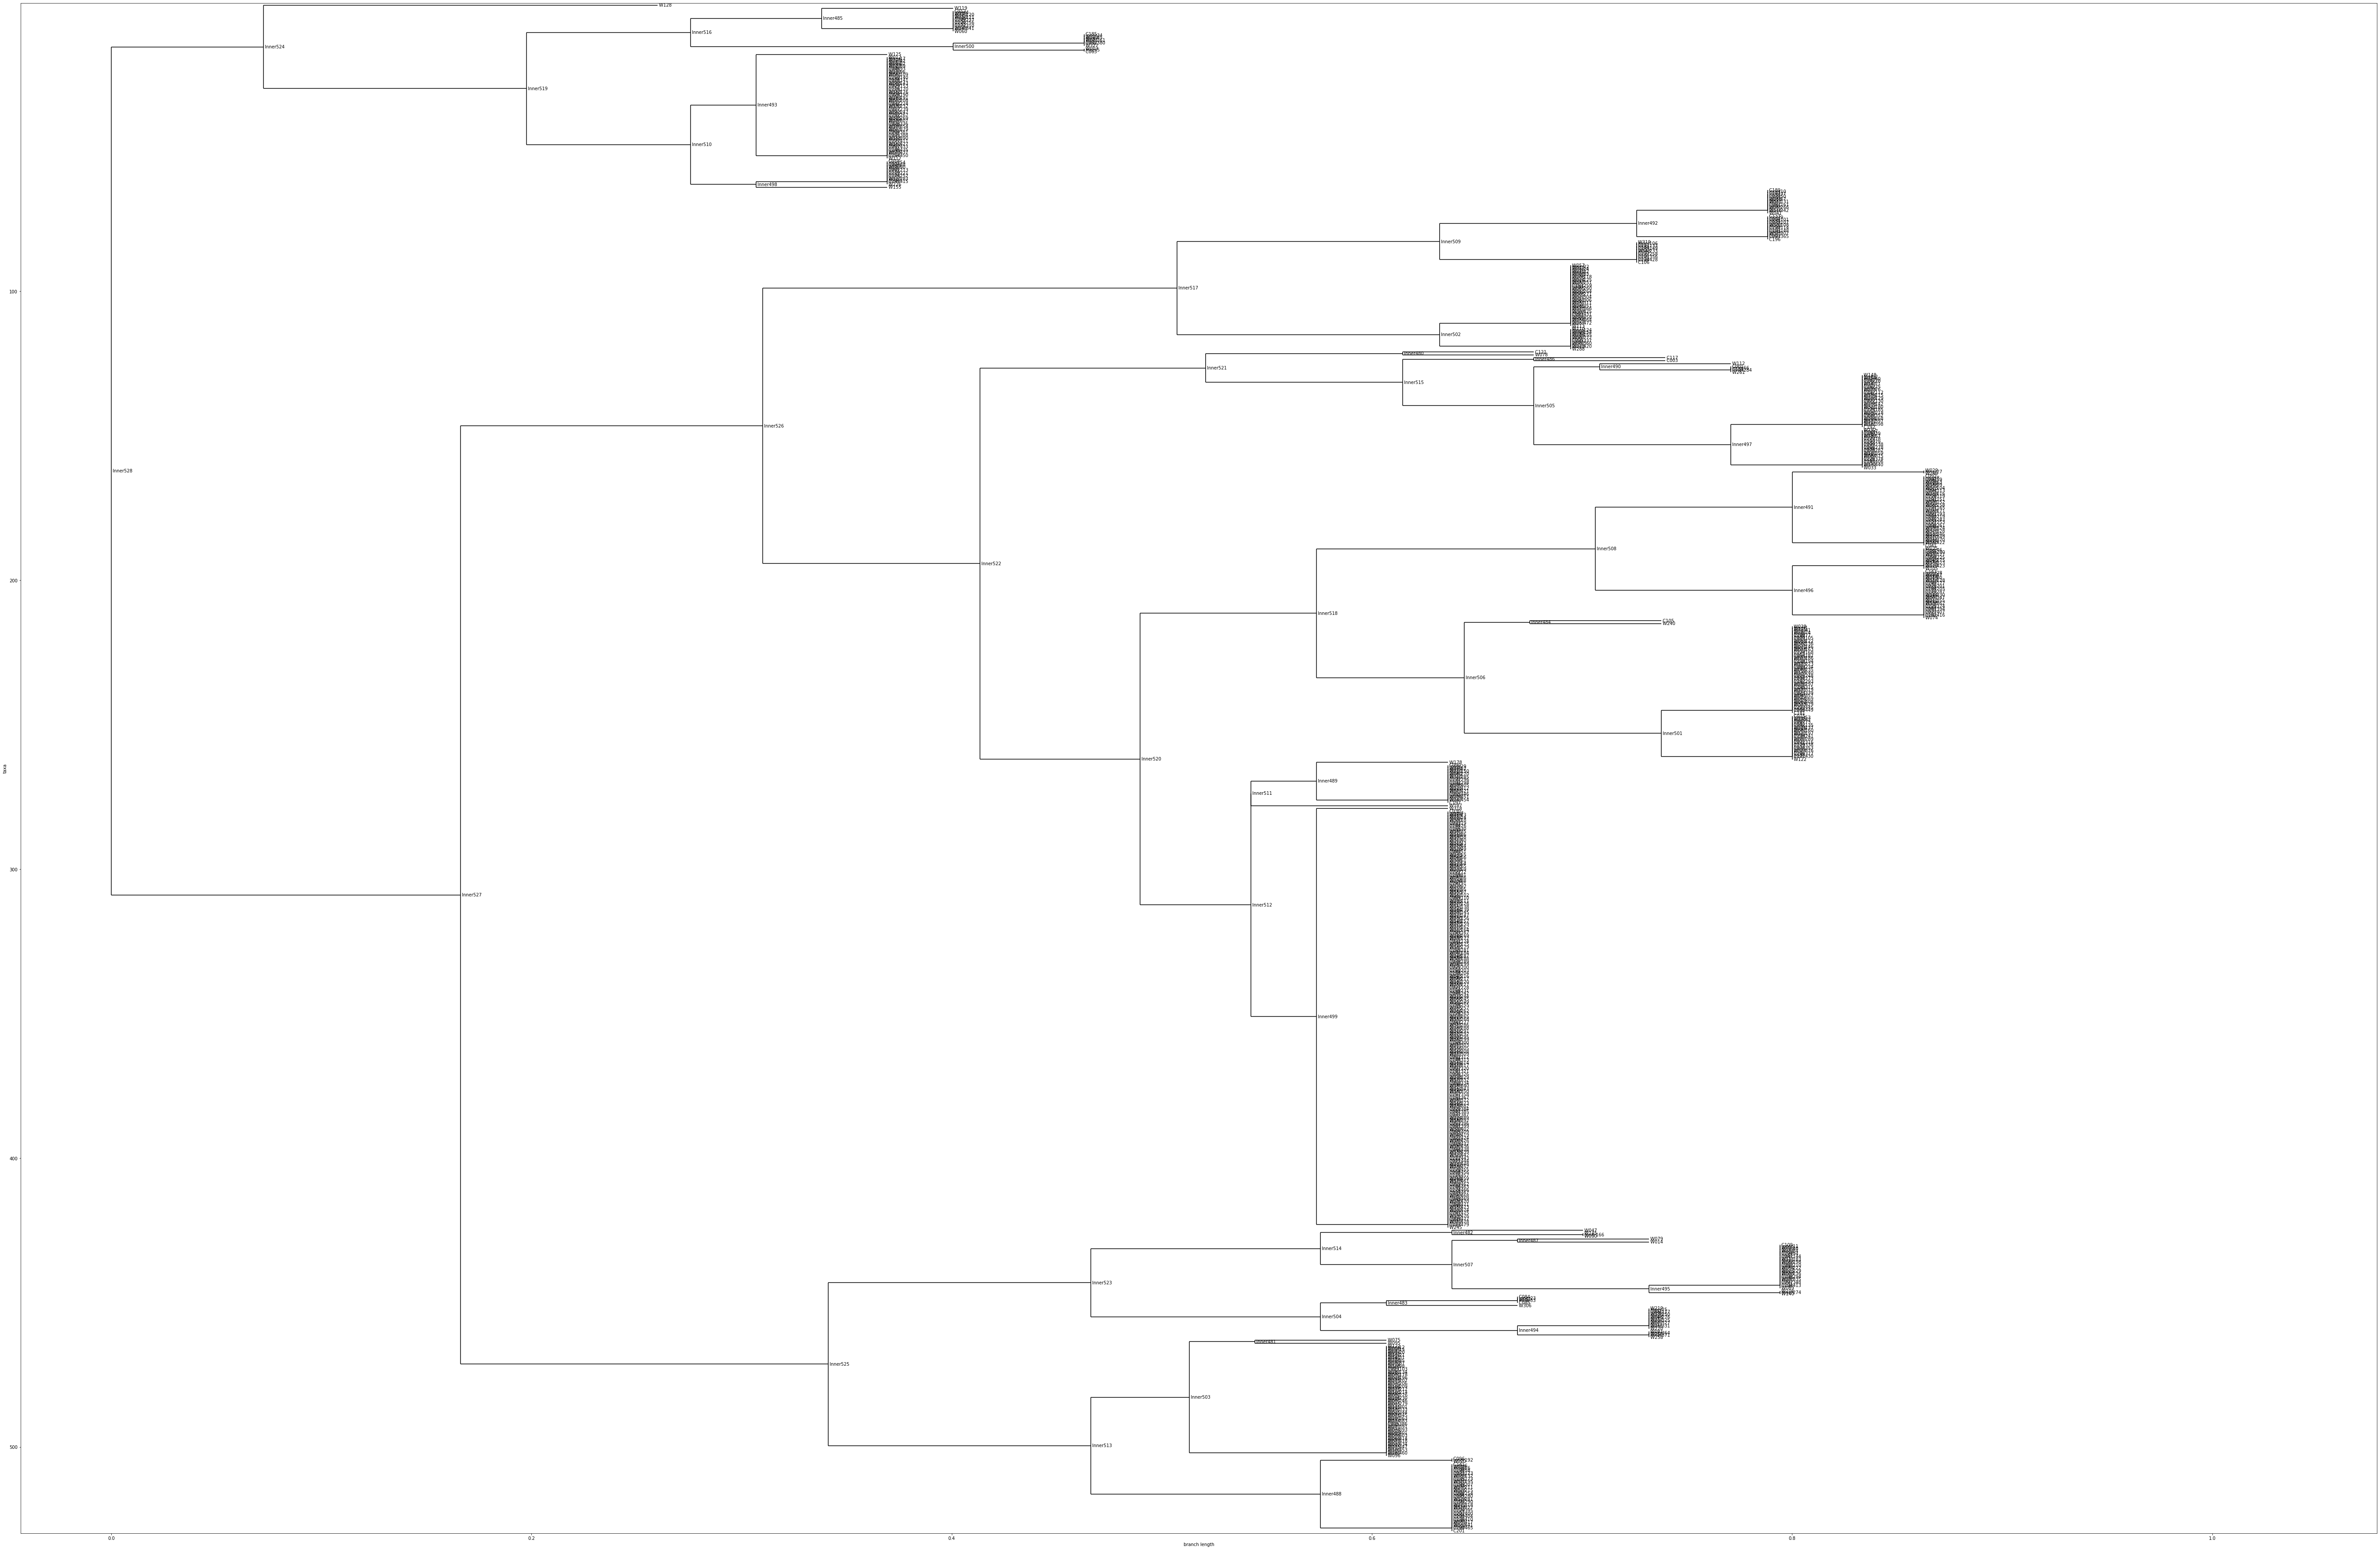

In [28]:
# Set the figure size
fig, ax = plt.subplots(figsize=(96, 64))

# Draw the tree with the larger size
Phylo.draw(tree, axes=ax)

plt.show()

In [30]:
for clade in tree.find_clades():
    if not clade.is_terminal():
        seq_ids = [term.name for term in clade.get_terminals()]
        subpop_counts = {}
        for seq_id in seq_ids:
            subpop = subpopulations.get(seq_id, "")
            subpop_counts[subpop] = subpop_counts.get(subpop, 0) + 1
        if subpop_counts:
            max_count = max(subpop_counts.values())
            subpops = [k for k, v in subpop_counts.items() if v == max_count]
            len = 0
            for i in subpops:
                len += 1
            if len == 1:
                clade.name = subpops[0]

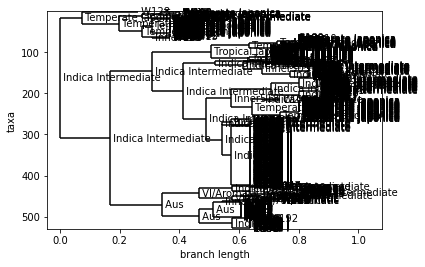

In [31]:
Phylo.draw(tree)

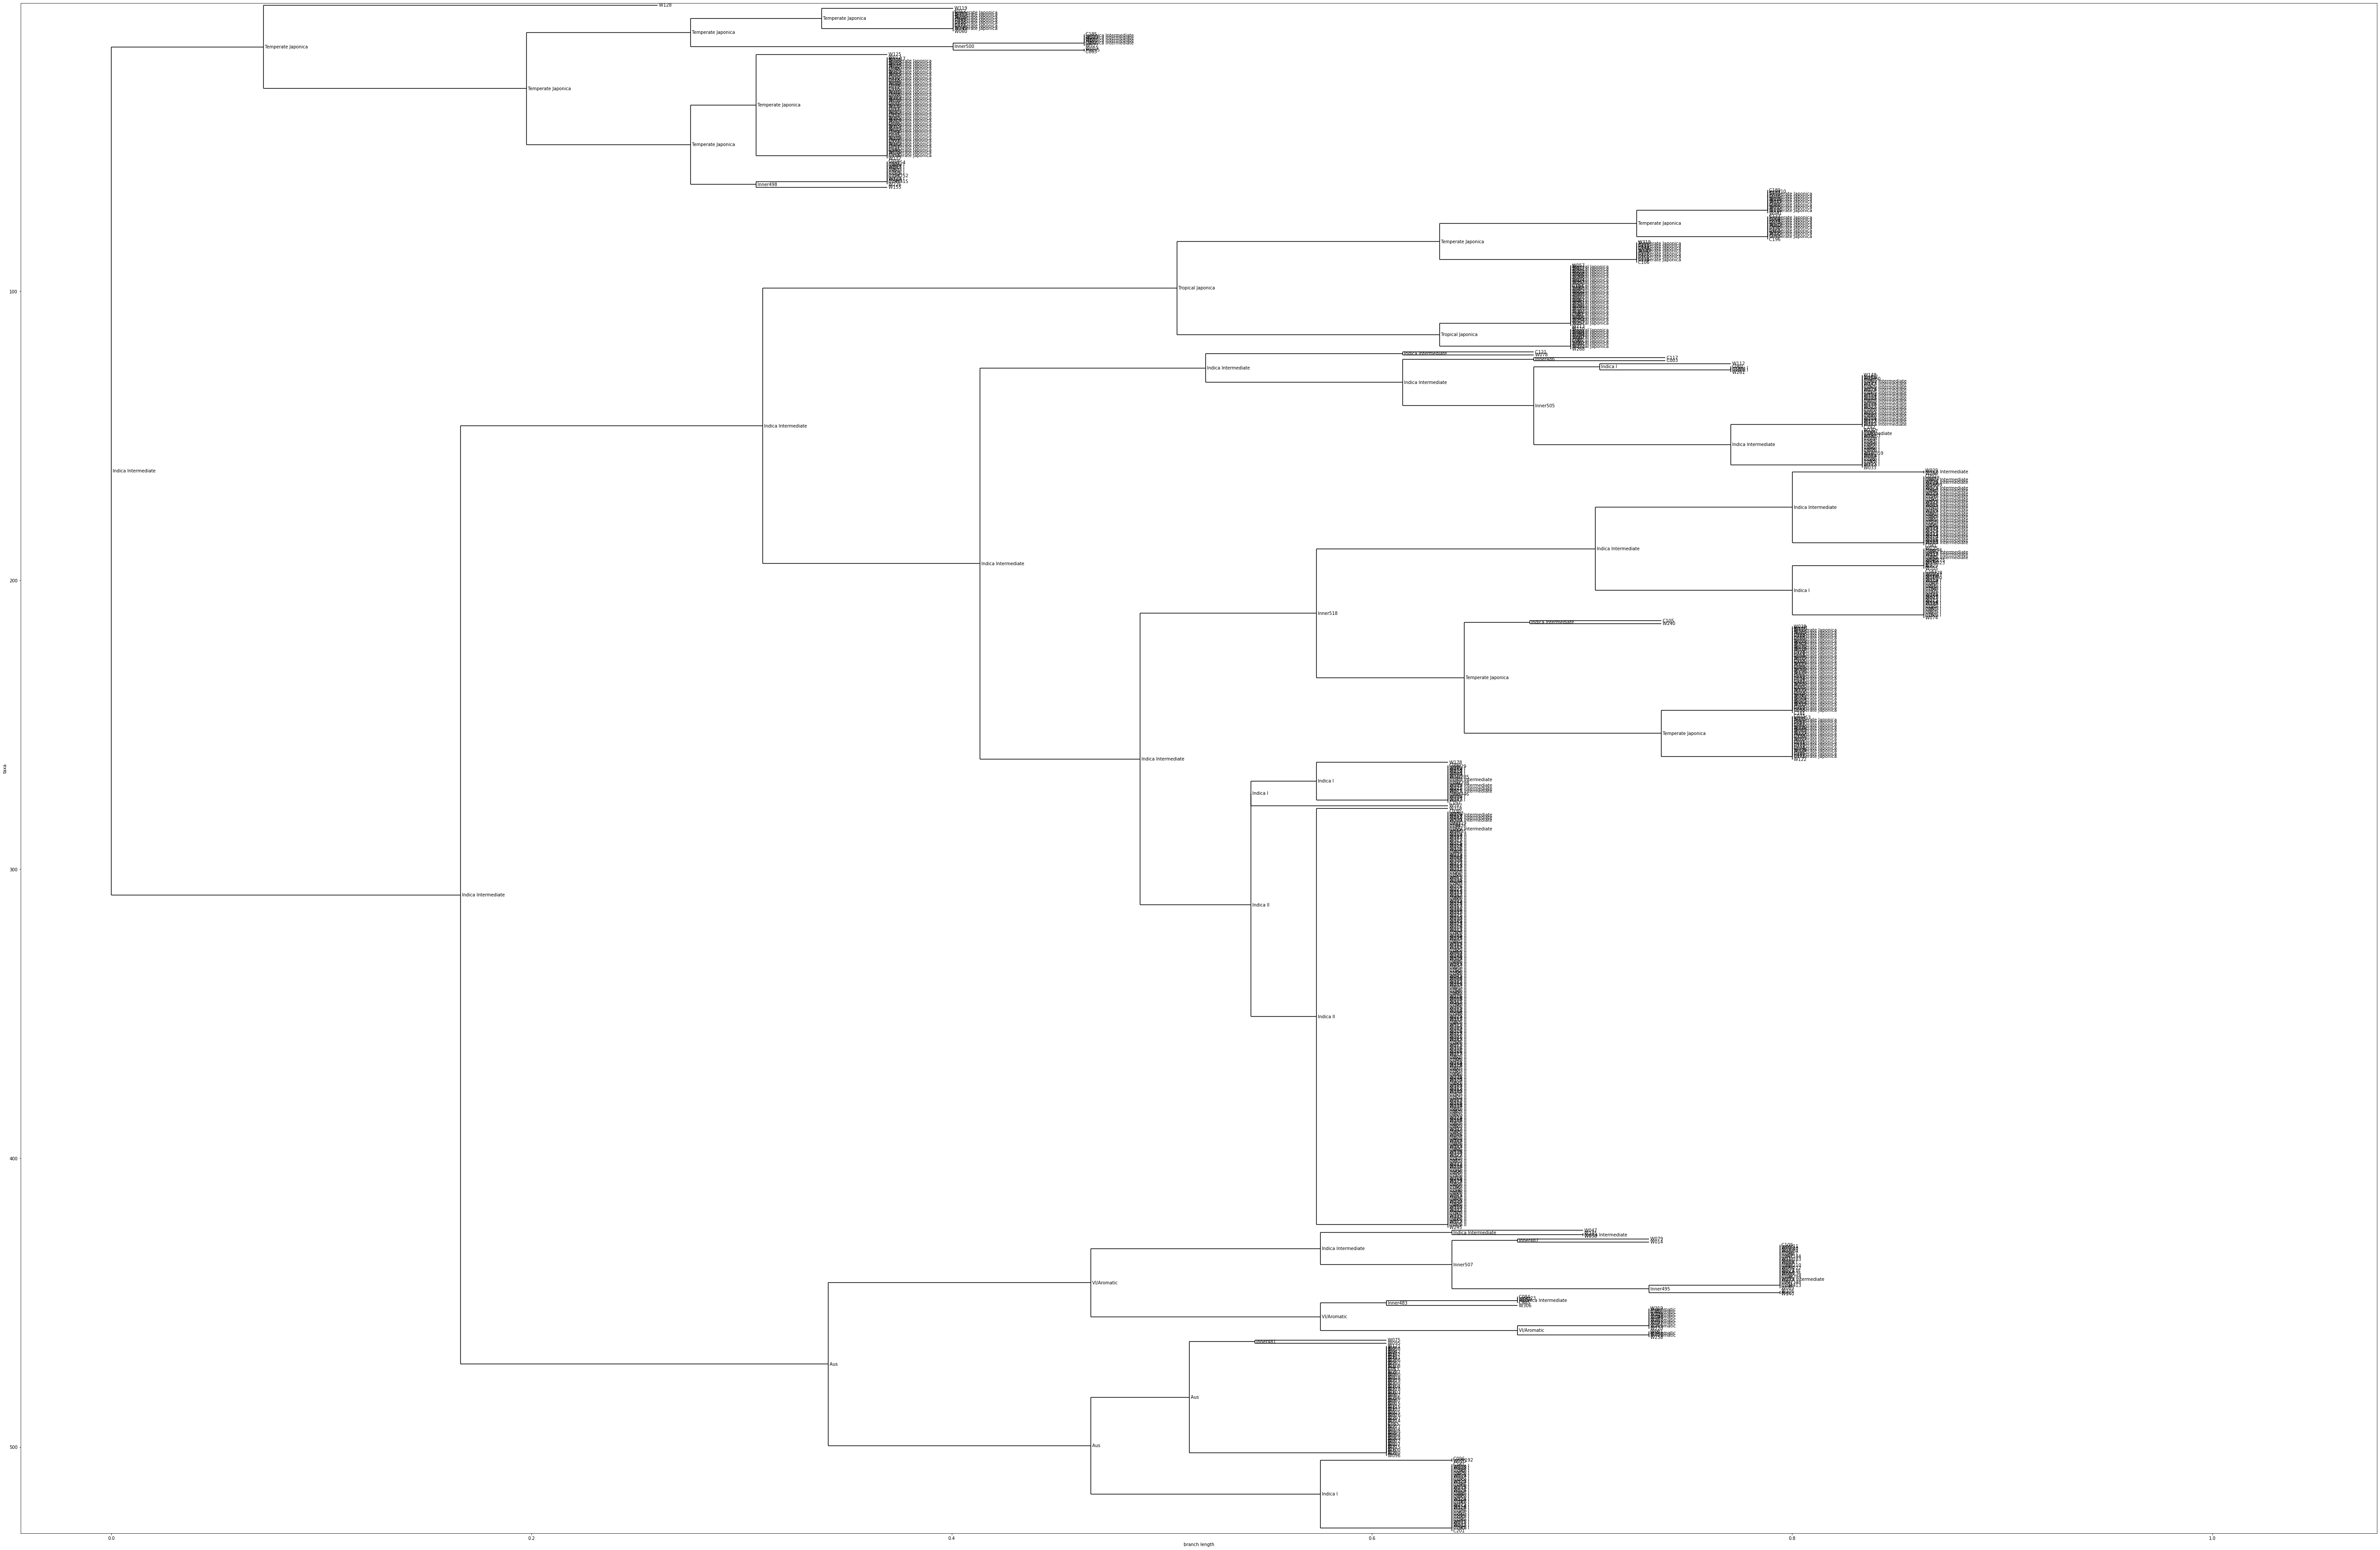

In [32]:
import matplotlib.pyplot as plt

# Set the figure size
fig, ax = plt.subplots(figsize=(96, 64))

# Draw the tree with the larger size
Phylo.draw(tree, axes=ax)

plt.show()

In [33]:
Phylo.write(tree, "tree.nwk", "newick")

1

In [34]:
for clade in tree.find_clades():
    if clade.is_terminal():
        print(clade)

W128
W119
C012
W193
W250
C149
C120
C172
W249
W060
C185
W323
W021
C052
W327
W003
C063
W125
W012
W328
W052
W027
C048
W207
W061
C150
C018
W088
C029
C116
W160
C028
W283
W010
C032
W130
C017
W063
C152
W305
W209
C026
W109
W013
C064
C035
W158
C177
W162
C057
C146
W016
C154
W117
C014
C024
W087
C051
C119
C114
W120
C145
W226
W155
C189
C123
C070
W056
W011
C087
W055
W116
W041
C133
C004
C079
W102
C130
C103
W325
C093
C196
W319
C111
C144
W143
C137
C101
C134
C106
W057
W017
W275
W008
W208
W024
W253
C153
W065
W053
W005
W022
W067
W251
W285
W123
W303
C083
W006
W254
W257
W113
W110
W004
W284
W007
C005
W002
W273
W288
C121
W078
C117
C003
W112
C001
C139
W261
W148
W154
C142
W147
C162
W274
C107
W194
W299
C072
W298
W321
C175
W291
C036
W304
W172
W181
C192
W192
C180
W191
C173
C193
C099
C066
C078
W107
W084
C128
C183
W132
W033
W029
W246
C092
C027
W206
W188
W073
C094
W239
C176
C191
W101
W085
C131
W269
C091
C060
C045
C127
C008
W199
W329
W133
W270
W266
W260
C041
W035
C086
W137
C098
W049
W134
W129
W105
C143
W282
W314
W114
